# House Sales in King County, USA

## Here is a brief description of the database

**Source**: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

This database contains prices for homes sold in King County, USA.
This dataset contains house sale prices for King County, which includes Seattle. is a sample of on-site sales between May 2014 and May 2015

* **id**: ID for the house

* **date**: Date the house was sold

* **price**: Price at which the house was sold

* **bedrooms**: Number of bedrooms the house has

* **bathrooms**: Number of bathrooms the house has

* **sqft_living**: Area within the property-measured in square feet

* **sqft_lot**: Lot area - measured in square feet

* **floors**: Number of floors

* **waterfront**: Indicates whether or not the property has a sea view

* **view**: Index from 0 to 4 that rates how good the view of the property was

* **condition**: Contains an index from 1 to 5 on the condition of the property

* **grade**: Contains an index of 1 to 13: a) 1-3->the property has a low level of construction and design; b) 7->has a medium level of construction and design; c) 11-13->has a high level of construction and design quality.

* **sqft_above**: Reports the area of the interior living space that is above ground level

* **sqft_basement**: Contains the basement area

* **yr_built**: Contains the construction date of the property

* **yr_renovated**: Contains the date of the last renovation carried out on the property

* **zipcode**: Contains zipcode

* **lat**: Latitude

* **long**: Longitude

* **sqft_living15**: Contains the average area within the properties of the 15 nearest neighbors-measured in square feet

* **sqft_lot15**: Contains the average area of the 15 nearest neighbors' lots-measured in square feet

In [1]:
%config IPCompleter.greedy=True

In [2]:
#Version python language
from platform import python_version
print('Current Version:', python_version())

Current Version: 3.9.7


In [3]:
!pip install -q -U watermark

In [4]:
!pip install -q ipython-sql

In [5]:
#To creatin messing value map
!pip install -q missingno

In [6]:
#Allows application of categorization to variables
!pip install -q category_encoders

In [7]:
#High-end graphics creation
!pip install -q plotly

In [8]:
#Statistic package
!pip install -q researchpy

In [64]:
#Imports

#Data manipulation
import pandas as pd
import numpy as np

#For using sqlite database
#import sqlite3 as sql3

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

#Statistic
import scipy
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
import researchpy as rp
    
#Attribute engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

#Ignore Warning; commands to ignore the warnings that come with packages
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [10]:
#Versions of packages used in this jupyter notebook
%reload_ext watermark
%watermark -a "Alexandre Palma Gonçalves" --iversions

Author: Alexandre Palma Gonçalves

missingno        : 0.5.1
sys              : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
scipy            : 1.7.1
plotly           : 5.6.0
matplotlib       : 3.4.3
pandas           : 1.3.4
seaborn          : 0.11.2
numpy            : 1.20.3
category_encoders: 2.4.0
researchpy       : 0.3.2



In [11]:
#Load the dataset
df=pd.read_csv('kc_house_data.csv')

## Preliminary Data Analysis

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [14]:
#Info
#other option: df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
#Number of observationsper variable
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [16]:
#Checking for duplicate ids
df['id'].nunique('id')

21436

In [17]:
#Number of repeated ids
(df['id'].count()) - (df['id'].nunique('id'))

177

In [18]:
#List of repeated ids
df['id'].value_counts()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

In [19]:
#Creating variable that contains the year the house was sold
df['year']=df['date'].str[:4]
df['year']=df['year'].astype('int64')

In [20]:
#Creating a categorical variable based on the age of the property
df['age_yr']=df['year']-df['yr_built']

df['property_age_classification']=np.where(df['age_yr']>=30, 'Old',
               np.where((df['age_yr']>=10) & (df['age_yr']<30), 'Intermediate Age',
               np.where(df['age_yr']<10, 'New','')))

df['property_age_classification']=pd.Categorical(df['property_age_classification'], categories=["Old", "Intermediate Age", "New"], ordered=True)

In [21]:
#Creation of a category for the notes assigned to the architecture of the property
df['architecture']=np.where(df['grade']<=5, 'Low Grade',
               np.where((df['grade']>5) & (df['grade']<=10), 'Average Grade',
               np.where(df['grade']>10, 'High Grade','')))


df['architecture']=pd.Categorical(df['architecture'], categories=['Low Grade', 'Average Grade', 'High Grade'], ordered=True)

In [22]:
#New variables created
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_yr,property_age_classification,architecture
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,59,Old,Average Grade
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,63,Old,Average Grade
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,82,Old,Average Grade
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,49,Old,Average Grade
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,28,Intermediate Age,Average Grade


## Descriptive Analysis of Qualitative Variables

In [23]:
#Describing non-numeric data
df.describe(include = object)

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [24]:
#Frequency table for the architecture variable
pd.crosstab(index=df['architecture'], columns="frequency_architecture")

col_0,frequency_architecture
architecture,
Low Grade,275
Average Grade,20836
High Grade,502


In [25]:
#Relative frequency table for the architecture variable
pd.crosstab(index=df['architecture'], columns="relative_frequency_architecture", normalize=True)

col_0,relative_frequency_architecture
architecture,
Low Grade,0.012724
Average Grade,0.964049
High Grade,0.023227


In [26]:
#Frequency table for the property_age_classification variable
pd.crosstab(index=df['property_age_classification'],columns="frequency_property_age_classification")

col_0,frequency_property_age_classification
property_age_classification,
Old,13387
Intermediate Age,5198
New,3028


In [27]:
#Relative frequency table for the property_age_classification variable
pd.crosstab(index=df['property_age_classification'], columns="relative_property_age_classification", normalize=True)

col_0,relative_property_age_classification
property_age_classification,
Old,0.619396
Intermediate Age,0.240503
New,0.140101


[Text(0, 0.5, 'Quantity')]

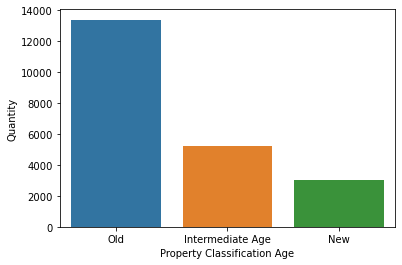

In [28]:
#Plot- property_age_classification variable
plot = sns.countplot(x='property_age_classification', data=df)
plot.set(xlabel="Property Classification Age")
plot.set(Ylabel="Quantity")

-------------------------------------------------------------------------------
col_0                        relative_frequency property_age_classification_2
property_age_classification                                                  
Old                                    0.619396                           Old
Intermediate Age                       0.240503              Intermediate Age
New                                    0.140101                           New
-------------------------------------------------------------------------------


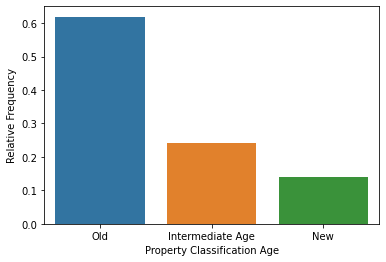

In [29]:
#Plot- relative frequency of property_age_classification variable

df_age=pd.crosstab(index=df['property_age_classification'], columns="relative_frequency", normalize=True)
df_age["property_age_classification_2"]=df_age.index #Creating the property_age_classification_2 column

print('-------------------------------------------------------------------------------')
print(df_age)
print('-------------------------------------------------------------------------------')

plot=sns.barplot(x='property_age_classification_2',y='relative_frequency',data=df_age)
plot.set(xlabel="Property Classification Age")
plot.set(ylabel="Relative Frequency")
plt.show()

## Descriptive Analysis of Quantitative Variables

In [30]:
#Describing the numeric data
df.describe().drop(columns=['id','zipcode','lat','long','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_living15,sqft_lot15,year,age_yr
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1986.552492,12768.455652,2014.322954,43.317818
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,685.391304,27304.179631,0.467616,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,399.000000,651.000000,2014.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1490.000000,5100.000000,2014.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1840.000000,7620.000000,2014.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2360.000000,10083.000000,2015.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,6210.000000,871200.000000,2015.000000,115.000000


-------------------------------------------------------------------------------
col_0     bedrooms_relative_frequency  bedrooms_2
bedrooms                                         
0                            0.000601           0
1                            0.009207           1
2                            0.127701           2
3                            0.454541           3
4                            0.318419           4
5                            0.074076           5
6                            0.012585           6
7                            0.001758           7
8                            0.000601           8
9                            0.000278           9
10                           0.000139          10
11                           0.000046          11
33                           0.000046          33
-------------------------------------------------------------------------------


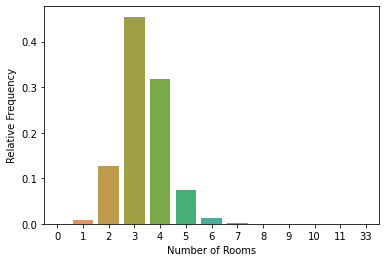

In [31]:
#Plot- relative frequency of bedrooms variable
df_bedrooms=pd.crosstab(index=df['bedrooms'], columns="bedrooms_relative_frequency", normalize=True)
df_bedrooms['bedrooms_2']=df_bedrooms.index

print('-------------------------------------------------------------------------------')
print(df_bedrooms)
print('-------------------------------------------------------------------------------')

#--------------------------
#Plot

plot=sns.barplot(x='bedrooms_2',y='bedrooms_relative_frequency',data=df_bedrooms)
plt.xlabel('Number of Rooms')
plt.ylabel('Relative Frequency')
plt.show()


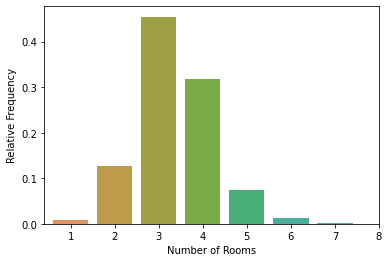

In [32]:
#Plot- relative frequency of bedrooms variable-Specifying some values
df_bedrooms=pd.crosstab(index=df['bedrooms'], columns="bedrooms_relative_frequency", normalize=True)
df_bedrooms['bedrooms_2']=df_bedrooms.index

#--------------------------
#Plot

plot=sns.barplot(x='bedrooms_2',y='bedrooms_relative_frequency',data=df_bedrooms)
plt.xlabel('Number of Rooms')
plt.ylabel('Relative Frequency')
plt.xlim(left=.4,right=8.0)
plt.show()

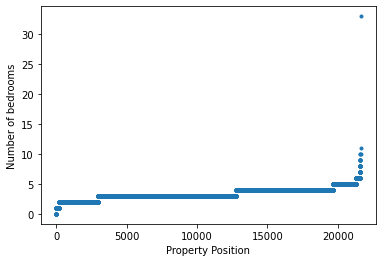

In [33]:
#Plot- frequency of bedrooms variable-Specifying some values-Variable Discrecy Check
z=df['bedrooms']
z=np.array(z)
z=np.sort(z)

plt.xlabel('Property Position')
plt.ylabel('Number of bedrooms')
plt.plot(z,'o', markersize=3)


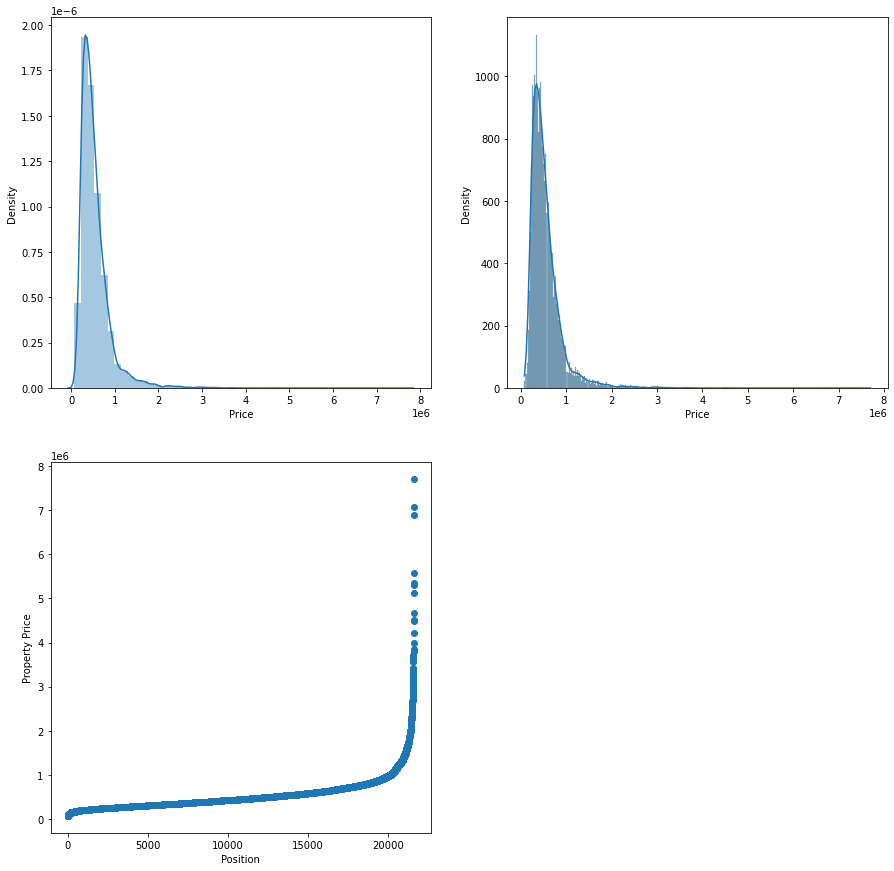

In [35]:
#Price variable-Density Graph

y=df['price']
y=np.array(y)
y=np.sort(y)


plt.figure(figsize=(15, 15))

plt.subplot(221)
plot=sns.distplot(df['price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.xticks(rotation=0)

plt.subplot(222)
plot=sns.histplot(df['price'],kde=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.xticks(rotation=0)

plt.subplot(223)
plt.ylabel('Property Price')
plt.xlabel('Position')
plt.plot(y, 'o')

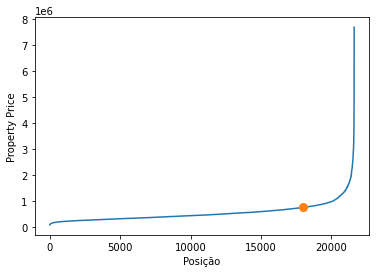

In [36]:
#Price variable-Plot the property of position 18000

x=df['price']
x=np.array(x)
x=np.sort(x)
plt.plot(x)

y=np.full(np.shape(x), np.nan)
y[18000]=x[18000]

plt.xlabel('Posição')
plt.ylabel('Property Price')
plt.plot(y, 'o', markersize=8) #other option --> plt.plot(y, 'ro', markersize=8); 'ro','co','bo'
plt.show()



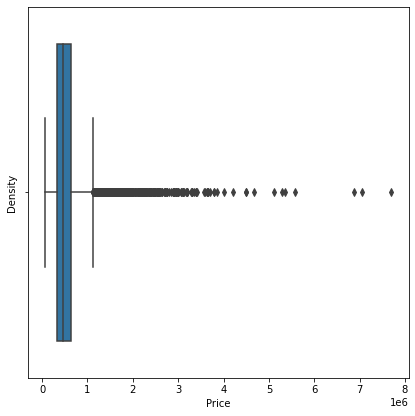

In [37]:
#Price variable-box-plot

plt.figure(figsize=(15, 15))

plt.subplot(221)
sns.boxplot(df['price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.xticks(rotation=0)

plt.show()

#other option
# sns.boxplot(df['price'])
# plt.xlabel('Preço do imóvel')
# plt.xticks(rotation=30)
# plt.show()


-------------------------------------------------------------------------------
property_age_classification       Old  Intermediate Age       New
architecture                                                     
Low Grade                    0.012446          0.000231  0.000046
Average Grade                0.603387          0.225327  0.135335
High Grade                   0.003563          0.014945  0.004719
-------------------------------------------------------------------------------


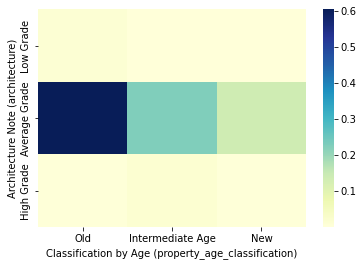

In [38]:
#Joint distributions of discrete qualitative and quantitative variables

#Qualitatives- architecture variable X property_age_classification variable
print('-------------------------------------------------------------------------------')
cross_tab_qualitatives_variables=pd.crosstab(df['architecture'],df['property_age_classification'],normalize=True)

print(cross_tab_qualitatives_variables)

print('-------------------------------------------------------------------------------')

#Heatmap
sns.heatmap(cross_tab_qualitatives_variables, cmap="YlGnBu")

plt.xlabel('Classification by Age (property_age_classification)')
plt.ylabel('Architecture Note (architecture)')

plt.show()




-------------------------------------------------------------------------------
bedrooms        0         1         2         3         4         5   \
floors                                                                 
1.0       0.000185  0.007495  0.090270  0.252394  0.110258  0.027992   
1.5       0.000000  0.000972  0.008421  0.036367  0.032295  0.008560   
2.0       0.000278  0.000555  0.022995  0.144265  0.170360  0.035858   
2.5       0.000000  0.000046  0.000231  0.002591  0.002684  0.001064   
3.0       0.000093  0.000139  0.005691  0.018739  0.002822  0.000601   
3.5       0.000046  0.000000  0.000093  0.000185  0.000000  0.000000   

bedrooms        6         7         8         9         10        11        33  
floors                                                                          
1.0       0.004812  0.000416  0.000231  0.000000  0.000046  0.000000  0.000046  
1.5       0.001388  0.000324  0.000046  0.000000  0.000000  0.000000  0.000000  
2.0       0.005506 

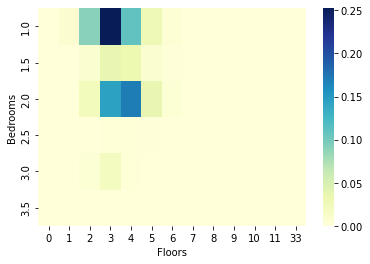

In [39]:
#Joint distributions of discrete qualitative and quantitative variables

#Quantitatives- floors variable X bedrooms variable
print('-------------------------------------------------------------------------------')
cross_tab=pd.crosstab(df['floors'],df['bedrooms'], normalize=True)

print(cross_tab)

print('-------------------------------------------------------------------------------')

#Heatmap
sns.heatmap(cross_tab, cmap="YlGnBu")

plt.xlabel('Floors')
plt.ylabel('Bedrooms')

plt.show()



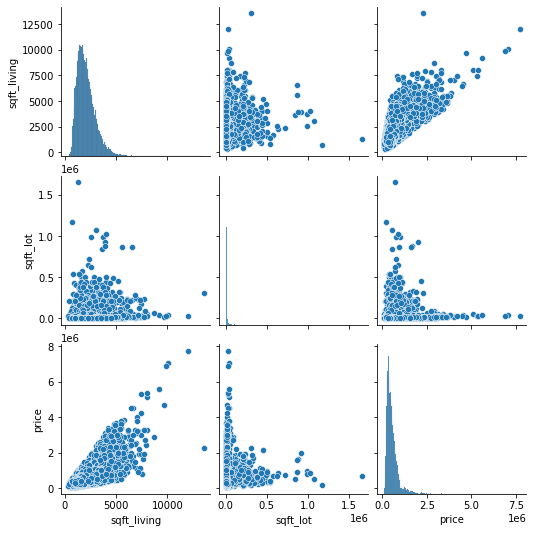

In [40]:
#Plot-Rolling distributions
sns.pairplot(df, vars=['sqft_living', 'sqft_lot', 'price'])
plt.show()

-------------------------------------------------------------------------------
                  Price  Property Area  Land Area
Price          1.000000       0.702035   0.089661
Property Area  0.702035       1.000000   0.172826
Land Area      0.089661       0.172826   1.000000
-------------------------------------------------------------------------------


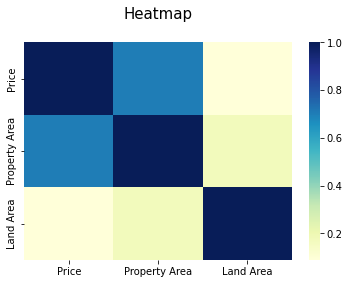

In [60]:
#Pearson correlation matrix-Quantitative variables
pearson_linear_correlation=df[["price","sqft_living","sqft_lot"]].corr()

pearson_linear_correlation.index=["Price","Property Area","Land Area"]
pearson_linear_correlation.columns=["Price","Property Area","Land Area"]

print('-------------------------------------------------------------------------------')
print(pearson_linear_correlation)

print("-------------------------------------------------------------------------------\n")
#Heatmap

sns.heatmap(pearson_linear_correlation, cmap="YlGnBu")
plt.title("Heatmap\n", fontsize = 15)
plt.show()

Text(27.0, 0.5, 'Price')

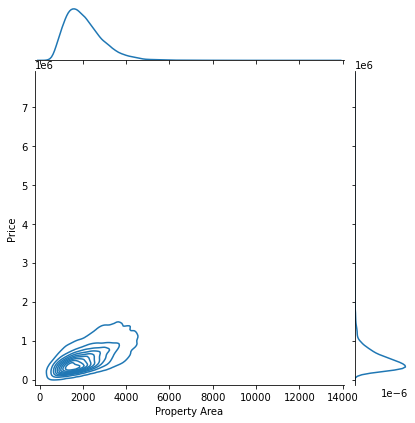

In [66]:
#Pearson correlation matrix-Quantitative variables
#Joint density graphs between above quantitative variables

plot=sns.jointplot(x=df["sqft_living"], y=df["price"], kind='kde')
plot.ax_joint.set_xlabel('Property Area')
plot.ax_joint.set_ylabel('Price')

Text(27.0, 0.5, 'Price')

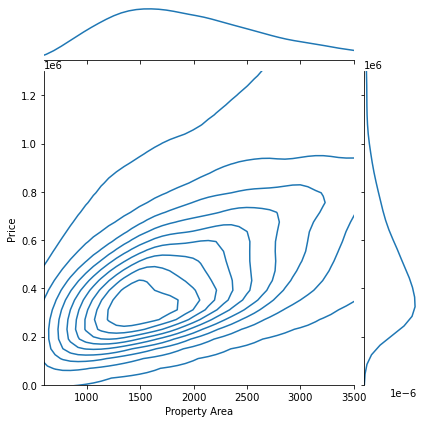

In [67]:
#Constraining the axes for better visualization of the part with more concentration

plot=sns.jointplot(x=df["sqft_living"], y=df["price"], kind='kde', xlim=(600,3500), ylim=(0,1300000))
plot.ax_joint.set_xlabel('Property Area')
plot.ax_joint.set_ylabel('Price')

In [68]:
#Kendall's Tau Calculation
tau,_=stats.kendalltau(df["price"], df["sqft_living"])

print("Kendall's Tau is: ", tau)

Kendall's Tau is:  0.46361128990437767


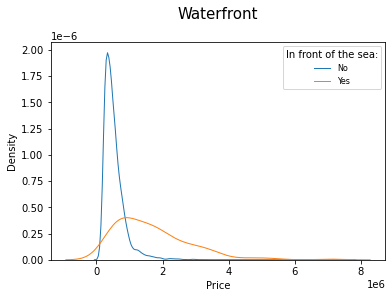

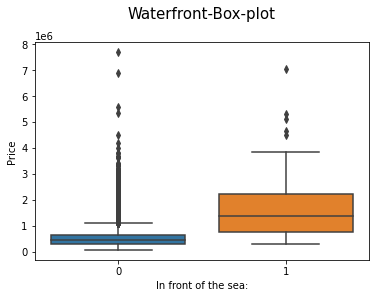

In [84]:
#Checking the price distribution being conditional on whether the property is facing the sea or not
waterfront_values = [0,1]
labels = ["No","Yes"]

# Loop
for waterfront_value in waterfront_values:
    
    subset = df[df['waterfront'] == waterfront_value]
    
    #Density plot
    sns.distplot(subset['price'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = labels[waterfront_value])
    

# Plot



plt.legend(prop={'size': 8}, title = 'In front of the sea:')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title("Waterfront\n", fontsize = 15)
plt.show()


sns.boxplot(x=df["waterfront"], y=df["price"])
plt.ylabel('Price')
plt.xlabel('In front of the sea:')
plt.title("Waterfront-Box-plot\n", fontsize = 15)
plt.show()


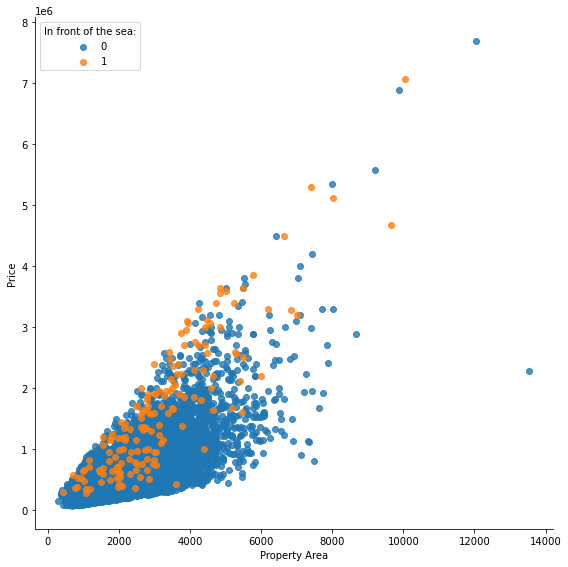

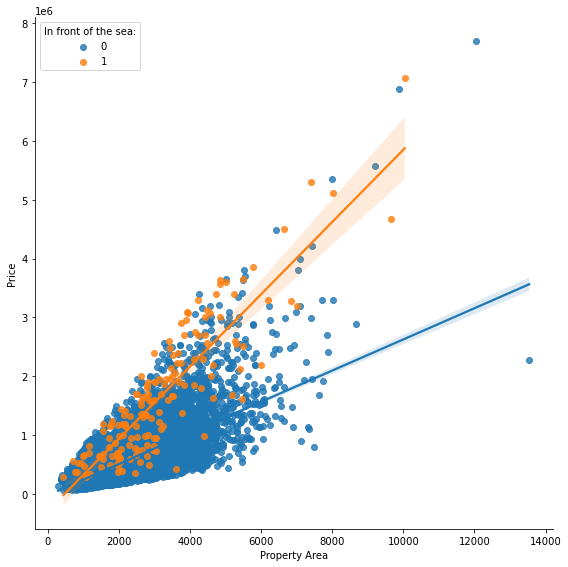

In [89]:
#Joint distributions of price and area of the property conditioned to the variable "waterfront"

sns.lmplot(x="sqft_living", y="price", data=df, fit_reg=False, legend=False, height=8, hue="waterfront") 

plt.legend(prop={'size': 10}, title = 'In front of the sea:')
plt.ylabel('Price')
plt.xlabel('Property Area')
plt.show()


sns.lmplot(x="sqft_living", y="price", data=df, fit_reg=True, legend=False, height=8, hue="waterfront") 

plt.legend(prop={'size': 10}, title = 'In front of the sea:')
plt.ylabel('Price')
plt.xlabel('Property Area')
plt.show()